In [98]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [99]:
# read in the smap data
datadir = "/home/teliu/work/aspp2/martini/sketch/"
cases = ['aspp2','iaspp','plaspp2','pliaspp']

    
landmarks = {i:np.loadtxt(datadir + i + "/" +"hddata",comments='#') for i in cases}
projectData = {i:np.loadtxt(datadir + i + "/" +"FULL_PROJECTION",comments='#') for i in cases}


#def read_datafile(indx=False):
#    if not indx:
#        gmds=np.loadtxt(os.path.join(cwd,"smap/hCaM/lowd.gmds"),comments='#')
#    else:
#        gmds=np.loadtxt(os.path.join(cwd,"smap/hCaM/lowd.gmds_%d" % (indx)),comments='#')
                        
#    return gmds

   

In [100]:
from matplotlib import rcParams
from scipy.stats import gaussian_kde
#rcParams['figure.figsize'] = 2.5,2
#rcParams['figure.dpi'] = 200


In [101]:
def get_density(data):
    x_axis=data[:,0]
    y_axis=data[:,1]
    zdata=np.vstack((x_axis,y_axis))
    z = gaussian_kde(zdata)(zdata)
    idx = z.argsort()
    x, y, z = data[:,0][idx], data[:,1][idx], z[idx]
    Zmax = np.max(z)
    energy = -np.log(z/Zmax)
    
    return x,y,z,Zmax

In [102]:
aspp2x,aspp2y,aspp2z,aspp2zmax = get_density(projectData['aspp2'])

In [103]:
iasppx,iasppy,iasppz,iasppzmax = get_density(projectData['iaspp'])

In [104]:
plaspp2x,plaspp2y,plaspp2z,plaspp2zmax = get_density(projectData['plaspp2'])

In [105]:
pliasppx,pliasppy,pliasppz,pliasppzmax = get_density(projectData['pliaspp'])


In [10]:
# the maxDensity of all three cases
maxDensity = np.max([aspp2zmax,iasppzmax,plaspp2zmax,pliasppzmax])

In [11]:
ZeroDensity=np.exp(-8.5)*maxDensity

In [75]:
print (ZeroDensity)

6.217022013959129e-09


In [76]:
# calcualte eneergy difference based on the maxDensity
def relativeEnerggy(density,baseDensity):
    """
    calculate the relative energy basd on the ratio of 
    density to baseDensity
    """
    energy = -np.log(density/baseDensity)
    return energy

In [77]:
aspp2rE = relativeEnerggy(aspp2z,aspp2zmax)
iaspprE = relativeEnerggy(iasppz,iasppzmax)
plaspp2rE = relativeEnerggy(plaspp2z,plaspp2zmax)
pliaspprE = relativeEnerggy(pliasppz,pliasppzmax)

In [78]:
from scipy import spatial

In [79]:
print (aspp2x)

[-487.43718593 -487.43718593 -487.43718593 ...  -25.12562814  -25.12562814
  -25.12562814]


In [80]:
print (aspp2rE)

[ 6.2738573  6.2738573  6.2738573 ... -0.        -0.        -0.       ]


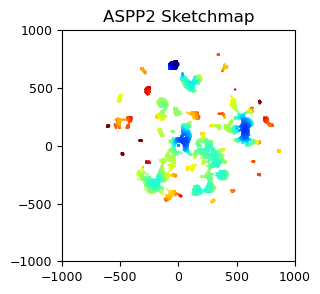

In [96]:
plt.figure(figsize=(3,3))
plt.scatter(aspp2x,aspp2y,c=aspp2rE,cmap="jet",s=3,vmax=5,edgecolor='none') #,s=3,edgecolor='',cmap='jet',vmax=0)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
#plt.colorbar()
plt.yticks(np.arange(-1000,1500,500))
plt.title('ASPP2 Sketchmap')
plt.plot([])
plt.subplots_adjust(wspace=0.01)
#plt.savefig('/home/teliu/work/aspp2/image/smap1.png',bbox_inches='tight',transparent=True)

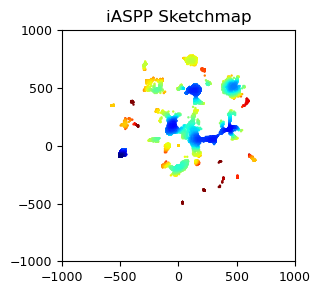

In [82]:
plt.figure(figsize=(3,3))
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.scatter(iasppx,iasppy,c=iaspprE,s=3,cmap='jet',vmax=5,edgecolor='none')#,edgecolor='none'
plt.title('iASPP Sketchmap')
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
plt.yticks(np.arange(-1000,1500,500))
plt.plot([])
plt.subplots_adjust(wspace=0.01)
#plt.savefig('/home/teliu/work/aspp2/image/smap2.png',bbox_inches='tight',transparent=True)

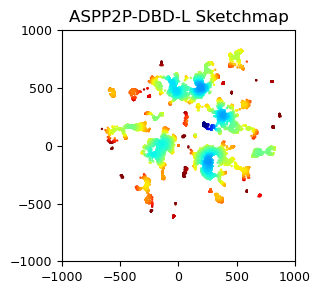

In [83]:
plt.figure(figsize=(3,3))
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.scatter(plaspp2x,plaspp2y,c=plaspp2rE,s=3,cmap='jet',vmax=5,edgecolor='none')#,edgecolor='none'
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
plt.yticks(np.arange(-1000,1500,500))
plt.title('ASPP2P-DBD-L Sketchmap')
plt.plot([])
plt.subplots_adjust(wspace=0.01)
#plt.savefig('/home/teliu/work/aspp2/image/smap3.png',bbox_inches='tight',transparent=True)

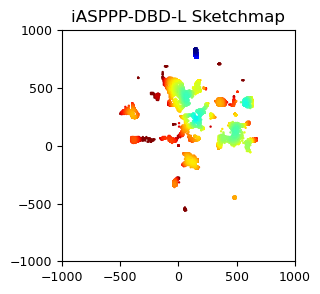

In [84]:
plt.figure(figsize=(3,3))
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.scatter(pliasppx,pliasppy,c=pliaspprE,s=3,cmap='jet',vmax=5,edgecolor='none')#,edgecolor='none'
plt.title('iASPPP-DBD-L Sketchmap')
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
plt.yticks(np.arange(-1000,1500,500))
#plt.colorbar()
plt.plot([])
plt.subplots_adjust(wspace=0.01)
#plt.savefig('/home/teliu/work/aspp2/image/smap4.png',bbox_inches='tight',transparent=True)

In [106]:
from scipy.stats import gaussian_kde

In [107]:
X, Y = np.mgrid[-1000:1000:200j, -1000:1000:200j]

In [108]:
print (X)

[[-1000.         -1000.         -1000.         ... -1000.
  -1000.         -1000.        ]
 [ -989.94974874  -989.94974874  -989.94974874 ...  -989.94974874
   -989.94974874  -989.94974874]
 [ -979.89949749  -979.89949749  -979.89949749 ...  -979.89949749
   -979.89949749  -979.89949749]
 ...
 [  979.89949749   979.89949749   979.89949749 ...   979.89949749
    979.89949749   979.89949749]
 [  989.94974874   989.94974874   989.94974874 ...   989.94974874
    989.94974874   989.94974874]
 [ 1000.          1000.          1000.         ...  1000.
   1000.          1000.        ]]


In [109]:
positions = np.vstack([X.ravel(), Y.ravel()])

In [110]:
def get_density(xdata,ydata):
    zdata=np.vstack((xdata,ydata))
    kernel = gaussian_kde(zdata)
    
    Z = np.reshape(kernel(positions).T, X.shape)
    
    return Z

In [111]:
z1 = get_density(aspp2x,aspp2y)
z2 = get_density(iasppx,iasppy)
z3 = get_density(plaspp2x,plaspp2y)
z4 = get_density(pliasppx,pliasppy)

In [112]:
print(np.min(z1),np.max(z1))

7.600861926759712e-99 1.2288186203087488e-05


In [113]:
print(np.min(z2),np.max(z2))

1.0645635610267873e-149 1.3052891309610333e-05


In [114]:
import matplotlib.patches as mpatches

In [115]:
from matplotlib.lines import Line2D

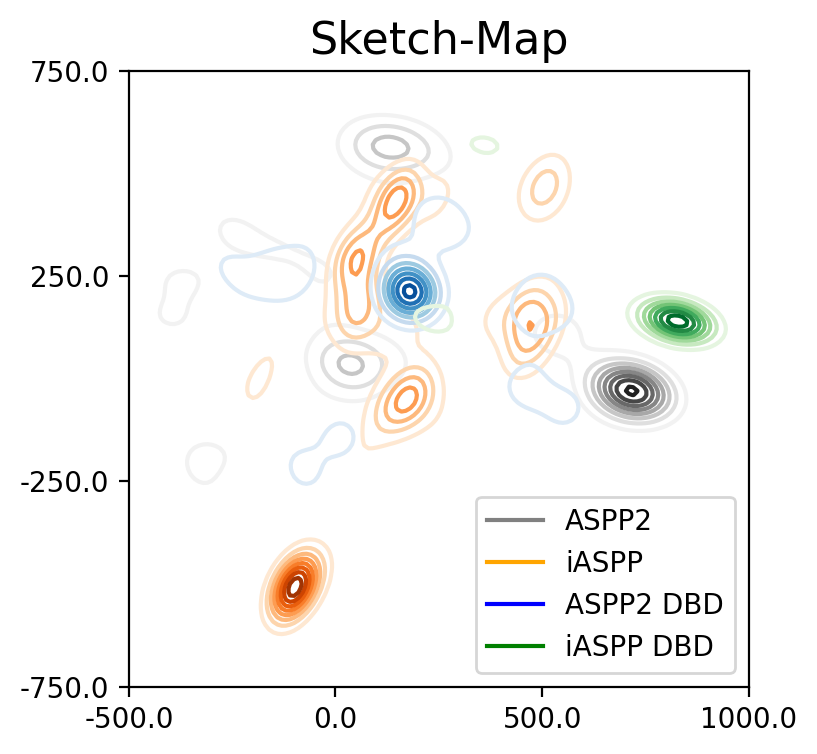

In [154]:
plt.figure(figsize=(4,4),dpi=200)
plt.contour(z1,cmap='Greys',levels=8,linewidths=1.5,linestyles='solid')
plt.contour(z2,cmap='Oranges',levels=8,linewidths=1.5,linestyles='solid')
plt.contour(z3,cmap='Blues',levels=8,linewidths=1.5,linestyles='solid')
plt.contour(z4,cmap='Greens',levels=8,linewidths=1.5,linestyles='solid')
plt.xlim([50,200])
plt.ylim([25,175])
plt.xticks(np.arange(50,250,50),np.floor((np.arange(50,250,50)-100)*10))
plt.yticks(np.arange(25,225,50),np.floor((np.arange(25,225,50)-100)*10))

handles, labels = plt.gca().get_legend_handles_labels()

line1 = Line2D([0], [0],label='ASPP2', color='gray')
line2 = Line2D([0], [0],label='iASPP', color='orange')
line3 = Line2D([0], [0],label='ASPP2 DBD', color='blue')
line4 = Line2D([0], [0],label='iASPP DBD', color='green')


handles.extend([line1,line2,line3,line4])

plt.legend(handles=handles,fontsize=10,loc=4)
plt.title('Sketch-Map',fontsize=16)
#plt.savefig('/home/teliu/work/aspp2/figure/fig5/sketch-map.png',bbox_inches='tight',transparent=True)